# Assignment 1 Python Netflix Data Analysis

# Questions
How has the number of titles added to Netflix changed over time (by year)?

Are there noticeable differences in release year or rating between two groups (e.g., Movies vs
TV Shows, or two ratings)?

Setting up the csv file

In [41]:
import os
from pathlib import Path
import subprocess
import zipfile

DATA_DIR = Path("data/netflix")
DATA_DIR.mkdir(parents=True, exist_ok=True)

csv_path = DATA_DIR / "netflix_titles.csv"

if csv_path.exists():
    print("✅ Found:", csv_path)

✅ Found: data\netflix\netflix_titles.csv


Imports

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

SEED = 0
rng = np.random.default_rng(SEED)

pd.set_option("display.max_columns", 50)
pd.set_option("display.width", 120)

DATA_DIR = Path("data/netflix")
CSV_PATH = DATA_DIR / "netflix_titles.csv"


Load Data

In [43]:
if not CSV_PATH.exists():
    raise FileNotFoundError(
        f"Missing {CSV_PATH}.\n"
        "Download from Kaggle (manual) or run the Kaggle API download cell above."
    )

df = pd.read_csv(CSV_PATH)
df.head(1)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."


Reorganize the Data into a shorter more readable method

In [44]:
df["date_added"] = pd.to_datetime(df["date_added"], errors="coerce")
df["year_added"] = df["date_added"].dt.year.astype("Int64")

df[["title", "type", "date_added", "year_added","duration"]].head(100)



,title,type,date_added,year_added,duration
0,Dick Johnson Is Dead,Movie,2021-09-25,2021,90 min
1,Blood & Water,TV Show,2021-09-24,2021,2 Seasons
2,Ganglands,TV Show,2021-09-24,2021,1 Season
3,Jailbirds New Orleans,TV Show,2021-09-24,2021,1 Season
4,Kota Factory,TV Show,2021-09-24,2021,2 Seasons
...,...,...,...,...,...
95,The Circle,TV Show,2021-09-08,2021,3 Seasons
96,If I Leave Here Tomorrow: A Film About Lynyrd ...,Movie,2021-09-07,2021,97 min
97,Kid Cosmic,TV Show,2021-09-07,2021,2 Seasons
98,Octonauts: Above & Beyond,TV Show,2021-09-07,2021,1 Season


Columns Key Dictionary
- Title- Shows the title of the work
- Type- Shows if it is a Movie or TV Show
- Date_added- Shows exact date of when it was added to Netflix
- Year_added- Shows only the year when it was added to Netflix
- Rating- What the movie/show was rated for audiences to watch


# Analysis 1



 Trend over time: titles per year (e.g., using release year or parsing date added)


In [45]:
df["year_added"].value_counts().sort_index()

year_added
2008       2
2009       2
2010       1
2011      13
2012       3
2013      10
2014      23
2015      73
2016     418
2017    1164
2018    1625
2019    1999
2020    1878
2021    1498
Name: count, dtype: Int64

Text(0.5, 1.0, 'Number of Titles Added to Netflix by Year')

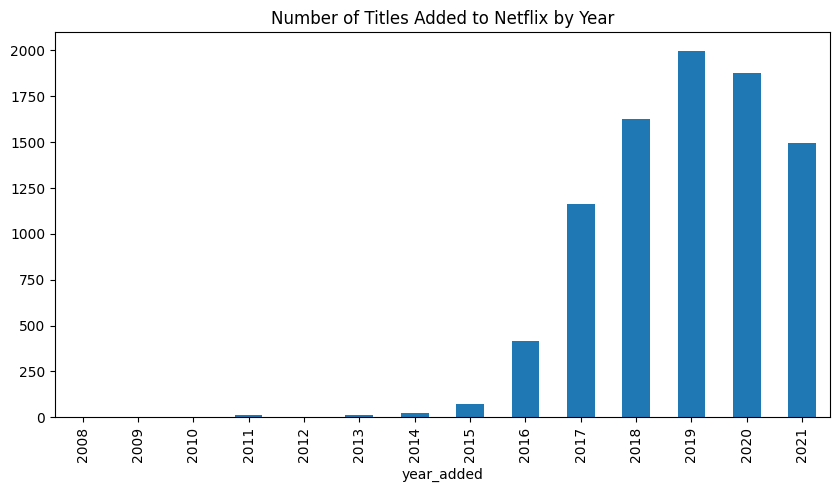

In [46]:
df["year_added"].value_counts().sort_index().plot(kind="bar", figsize=(10, 5))
plt.title("Number of Titles Added to Netflix by Year")

Question Answer:
- We see the rise of titles increase exponentially across the 2014-2019 time period. It then starts to fall off at the year 2020 and beyond. This may show that there were a lot of tiles that were able to be added at that time and later on they were not able to gather as many new titles to add to the software.


# Analysis 2


Comparison of two groups: pick two groups (e.g., Movies vs TV Shows, or two ratings) and
compare a metric (e.g., duration, release year)

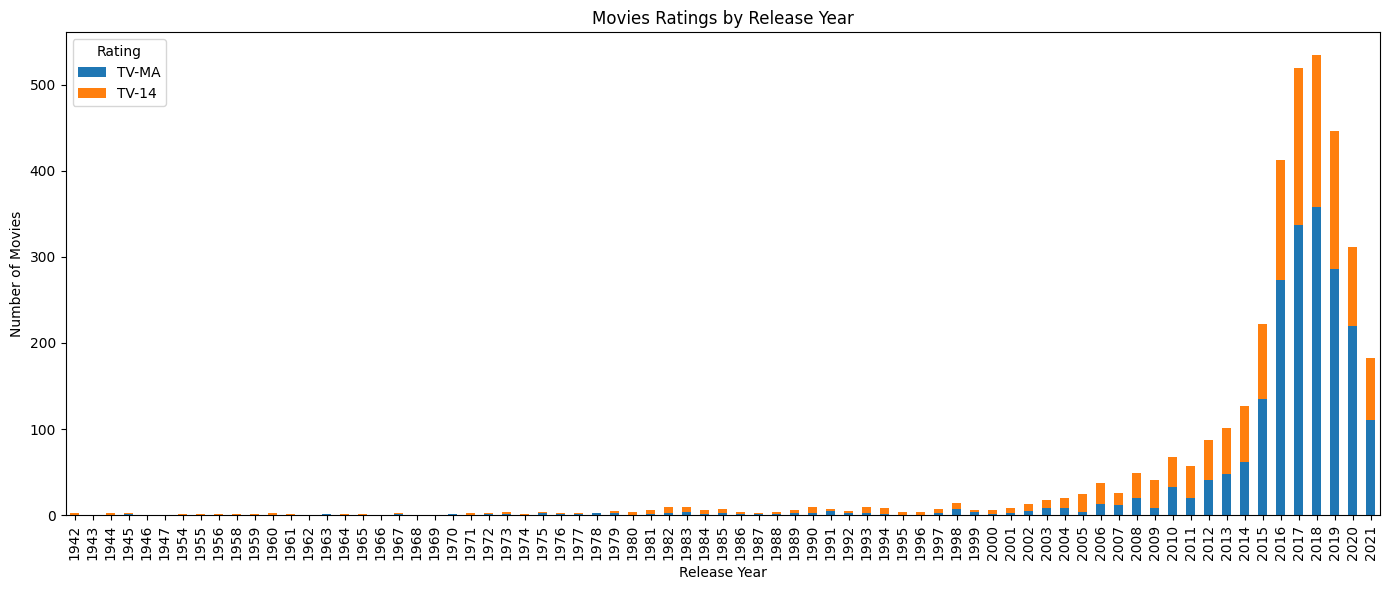

In [64]:
movies = df[df["type"] == "Movie"]
movies_by_year_rating = movies.groupby(["release_year", "rating"]).size().unstack(fill_value=0)
top_ratings = movies["rating"].value_counts().head(2).index
movies_by_year_rating[top_ratings].plot(kind="bar", stacked=True, figsize=(14, 6))
plt.title("Movies Ratings by Release Year")
plt.xlabel("Release Year")
plt.ylabel("Number of Movies")
plt.legend(title="Rating")
plt.tight_layout()
plt.show()

Question Answer:
- This graph is comparing TV-MA and TV-14 on the number of movies which were released of each rating type. The movies which were rated TV-14 were higher in number in the earlier release years and then TV-MA over grew it on the later years staring around 2012.